In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

f01_loc = '/content/drive/My Drive/CSE422_Ass05_dataset/preprocessed_car_dataset.csv'

mycar_df = pd.read_csv(f01_loc)


print("Figuere of the DF after preprocess:", mycar_df.shape)


Figuere of the DF after preprocess: (17812, 33)


In [3]:
mycar_df.head(5)

,year,price,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,model_ Focus,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.328125,0.211101,0.203867,0.2,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,0.343750,0.247798,0.203867,0.2,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,0.328125,0.229450,0.203867,0.2,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
3,0.359375,0.312018,0.107735,0.3,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
4,0.359375,0.293670,0.154144,0.2,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [4]:
#after doing one-hot encoding in preprocessing we got this shape3
mycar_df.shape
print(f"Shape: {mycar_df.shape}, Columns: {(mycar_df.columns)}")


Shape: (17812, 33), Columns: Index(['year', 'price', 'mpg', 'engineSize', 'model_ C-MAX', 'model_ EcoSport',
       'model_ Edge', 'model_ Escort', 'model_ Fiesta', 'model_ Focus',
       'model_ Fusion', 'model_ Galaxy', 'model_ Grand C-MAX',
       'model_ Grand Tourneo Connect', 'model_ KA', 'model_ Ka+',
       'model_ Kuga', 'model_ Mondeo', 'model_ Mustang', 'model_ Puma',
       'model_ Ranger', 'model_ S-MAX', 'model_ Streetka',
       'model_ Tourneo Connect', 'model_ Tourneo Custom',
       'model_ Transit Tourneo', 'model_Focus', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Electric', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')


In [5]:
print(mycar_df.dtypes)


year                            float64
price                           float64
mpg                             float64
engineSize                      float64
model_ C-MAX                       bool
model_ EcoSport                    bool
model_ Edge                        bool
model_ Escort                      bool
model_ Fiesta                      bool
model_ Focus                       bool
model_ Fusion                      bool
model_ Galaxy                      bool
model_ Grand C-MAX                 bool
model_ Grand Tourneo Connect       bool
model_ KA                          bool
model_ Ka+                         bool
model_ Kuga                        bool
model_ Mondeo                      bool
model_ Mustang                     bool
model_ Puma                        bool
model_ Ranger                      bool
model_ S-MAX                       bool
model_ Streetka                    bool
model_ Tourneo Connect             bool
model_ Tourneo Custom              bool


In [6]:
# here for continuous variables we have:
"""
year                            float64
price                           float64
mpg                             float64
engineSize                      float64
"""

# my goal is to apply both linear and logistic regressionnn on PRICE and evaluate
"""
For Linearss Regressionn we use continuouss variables
For Logisstic regressionn we use catagoricall/bool vars
"""



'\nFor Linearss Regressionn we use continuouss variables\nFor Logisstic regressionn we use catagoricall/bool vars\n'

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

"""
Doing Linear Regression first. To do so:
we need to make *price* the target; all the other
columns/variables will be features.
"""

features_lin = mycar_df.drop('price', axis=1) # others except price will be featuress
target = mycar_df['price']    #  'price'  because it will be our targett

X_train_spplit, X_test_spplit, y_train_spplit, y_test_spplit = train_test_split(features_lin, target, test_size=0.2, random_state=42)

# using random state 42, commonly used; it controls the ramdomness while splitting the datae

linearr_model_reg = LinearRegression()
linearr_model_reg.fit(X_train_spplit, y_train_spplit)

y_predictions = linearr_model_reg.predict(X_test_spplit)


In [8]:
mse_value = mean_squared_error(y_test_spplit, y_predictions)
r2_value = r2_score(y_test_spplit, y_predictions) # used math library's sqrt instead

print(f"Mean Squared Errors (MSE): {mse_value}")
print(f"R-squared  (R²): {r2_value}")

rmse = sqrt(mse_value)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Errors (MSE): 0.0018231713616519692
R-squared  (R²): 0.7584952096780808
Root Mean Squared Error (RMSE): 0.042698610769578545


In [9]:
"""
Now for Logistic regression
a thresholdd needs to be  choosedddn to categorizee the price
"""

threshold = mycar_df['price'].median()

mycar_df['price_category'] = (mycar_df['price'] > threshold).astype(int)  #comparison to catagorize greateer or less than median

features_log = mycar_df.drop(['price', 'price_category'], axis=1)
target_log = mycar_df['price_category'] #making it target agin for loggisticregresion

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(features_log, target_log, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_log, y_train_log)

y_pred_log = log_model.predict(X_test_log)

accuracy = accuracy_score(y_test_log, y_pred_log)
print(f"Logisticc Regressionn Acccuracy: {accuracy}")
print("\nClassificationc Reports:")
print(classification_report(y_test_log, y_pred_log))

Logisticc Regressionn Acccuracy: 0.8818411451024417

Classificationc Reports:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1802
           1       0.89      0.87      0.88      1761

    accuracy                           0.88      3563
   macro avg       0.88      0.88      0.88      3563
weighted avg       0.88      0.88      0.88      3563



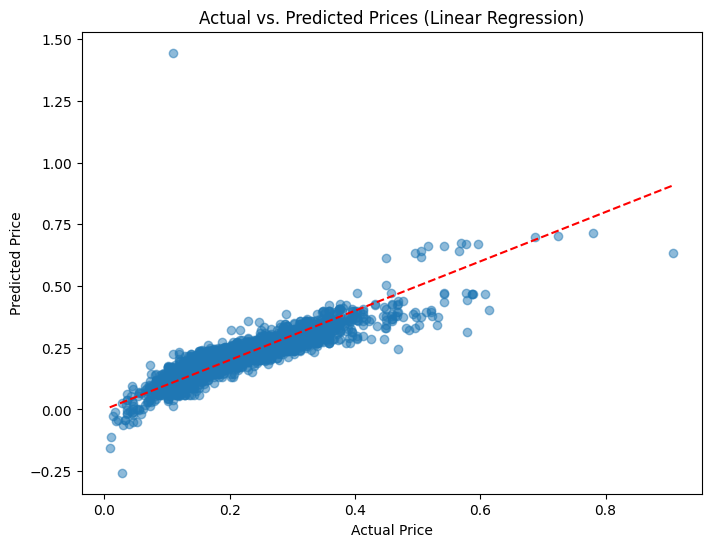

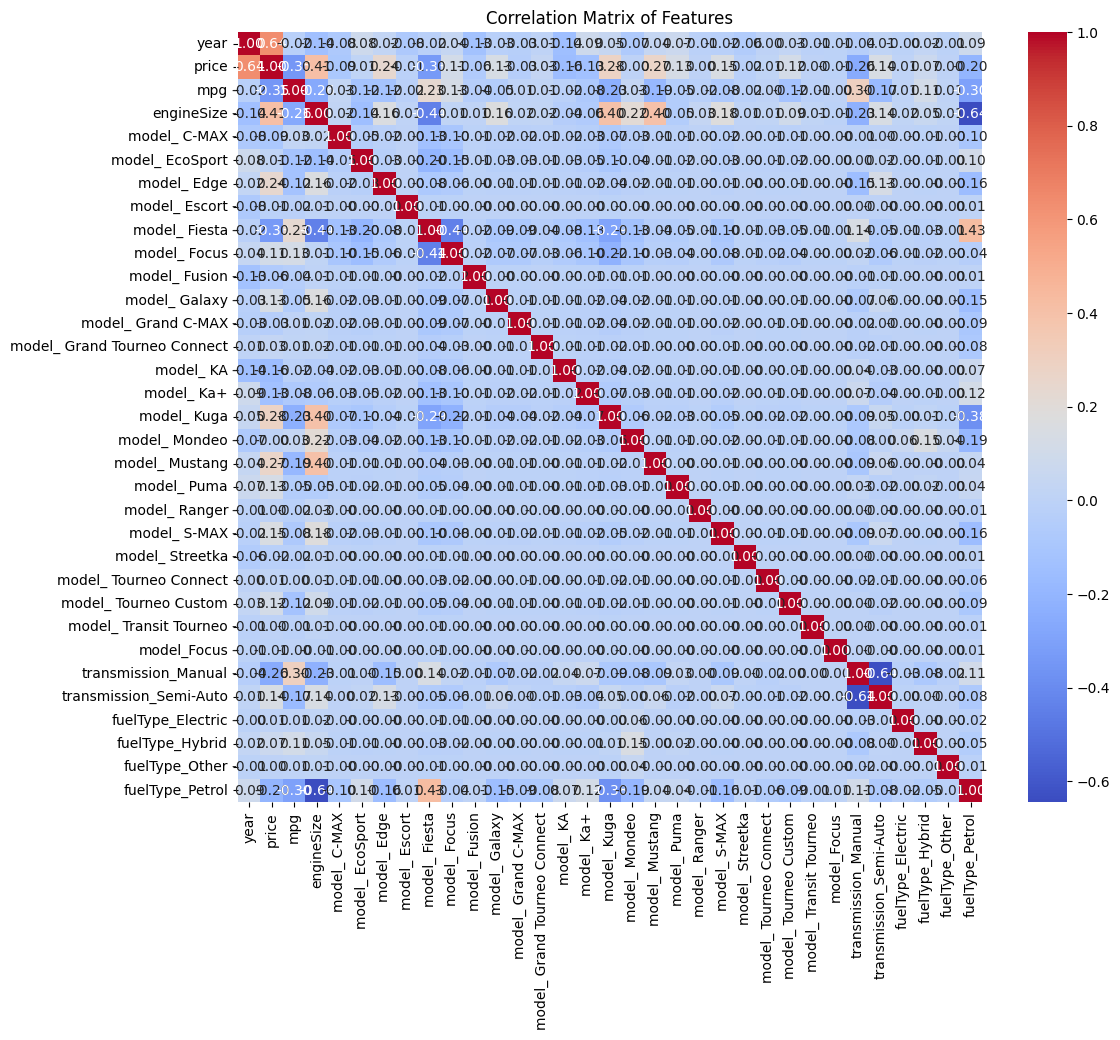

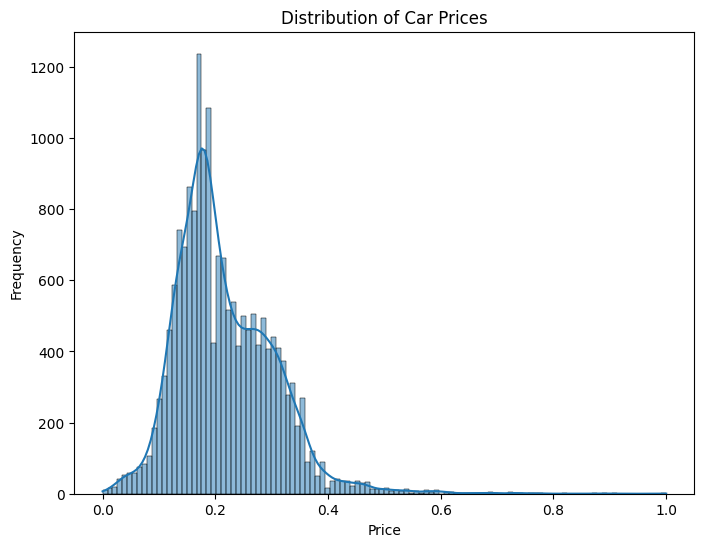

In [14]:


import matplotlib.pyplot as plt
import seaborn as sns



# Scatter plot of actual vs predicted prices for linear regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test_spplit, y_predictions, alpha=0.5)
plt.plot([min(y_test_spplit), max(y_test_spplit)], [min(y_test_spplit), max(y_test_spplit)], color='red', linestyle='--')  # Add diagonal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.show()


# correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = mycar_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()


# a histogram of the target variable ('price')
plt.figure(figsize=(8, 6))
sns.histplot(mycar_df['price'], kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [ ]:


# Explore individual feature distributions
for column in features_lin.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(mycar_df[column], kde=True)
  plt.title(f"Distribution of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

# Box plots to visualize potential outliers
for column in features_lin.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=mycar_df[column])
    plt.title(f"Box Plot of {column}")
    plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(mycar_df, vars=['price', 'year', 'mpg', 'engineSize'])
plt.show()

Mean Squared Errors (MSE): 0.0017730426291361237
R-squared  (R²): 0.7651354681255222
Root Mean Squared Error (RMSE): 0.042107512739843984


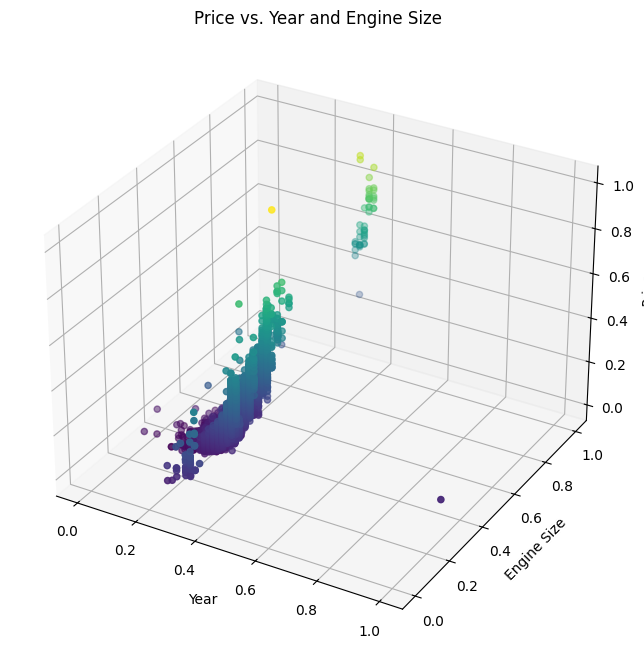

In [15]:
# Feature engineering: Create interaction terms or polynomial features
# Example: interaction between year and engineSize
mycar_df['year_engine_interaction'] = mycar_df['year'] * mycar_df['engineSize']

# Redefine features and target
features_lin = mycar_df.drop('price', axis=1)
target = mycar_df['price']

# Retrain the linear regression model
X_train_spplit, X_test_spplit, y_train_spplit, y_test_spplit = train_test_split(features_lin, target, test_size=0.2, random_state=42)
linearr_model_reg = LinearRegression()
linearr_model_reg.fit(X_train_spplit, y_train_spplit)
y_predictions = linearr_model_reg.predict(X_test_spplit)

# Evaluate the model
mse_value = mean_squared_error(y_test_spplit, y_predictions)
r2_value = r2_score(y_test_spplit, y_predictions)
rmse = sqrt(mse_value)

print(f"Mean Squared Errors (MSE): {mse_value}")
print(f"R-squared  (R²): {r2_value}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


# More advanced visualizations
# 3D scatter plot for better visualization of interactions
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mycar_df['year'], mycar_df['engineSize'], mycar_df['price'], c=mycar_df['price'], cmap='viridis')
ax.set_xlabel('Year')
ax.set_ylabel('Engine Size')
ax.set_zlabel('Price')
plt.title('Price vs. Year and Engine Size')
plt.show()

In [27]:
print(f"Logistic Regression Predictions:\n{y_pred_log}")

# Comparing Logistic Regression and Linear Regression
print("\nModel Comparison:")
print("Logistic Regression is better for classification tasks where the target variable is categorical,")
print("as in this case, the price is categorized above or below the median.  ")
print("Linear Regression is designed for continuous target variables, predicting actual prices.")
print("The previous Logistic Regression accuracy of 0.88 indicates a reasonably good performance in classifying prices.")
print("The current logistic regression accuracy is", accuracy)

Logistic Regression Predictions:
[1 1 1 ... 0 1 0]

Model Comparison:
Logistic Regression is better for classification tasks where the target variable is categorical,
as in this case, the price is categorized above or below the median.  
Linear Regression is designed for continuous target variables, predicting actual prices.
The previous Logistic Regression accuracy of 0.88 indicates a reasonably good performance in classifying prices.
The current logistic regression accuracy is 0.8818411451024417
